In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
URL = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
df = pd.read_csv(URL)
df["data"] = pd.to_datetime(df[["year", "month", "day"]])
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,data
0,29/07/2020,29,7,2020,103,1,Afghanistan,AF,AFG,38041757.0,Asia,4.550263,2020-07-29
1,28/07/2020,28,7,2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia,5.028685,2020-07-28
2,27/07/2020,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187,2020-07-27
3,26/07/2020,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546,2020-07-26
4,25/07/2020,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913,2020-07-25


In [ ]:
df["continentExp"].value_counts()

Europe     9644
Asia       7583
Africa     7391
America    6972
Oceania    1196
Other        64
Name: continentExp, dtype: int64

In [ ]:
df_all=df.groupby(["data", "continentExp"])[["cases","deaths"]].sum().reset_index()
df_europa=df_all[df_all["continentExp"] == "Europe"]
df_wykres = df_europa.sort_values(by=["data"])
df_wykres.head()

,data,continentExp,cases,deaths
3,2019-12-31,Europe,0,0
9,2020-01-01,Europe,0,0
15,2020-01-02,Europe,0,0
21,2020-01-03,Europe,0,0
27,2020-01-04,Europe,0,0


Text(0.5, 1.0, 'Liczba zachorowań na COVID-19 w Europie')

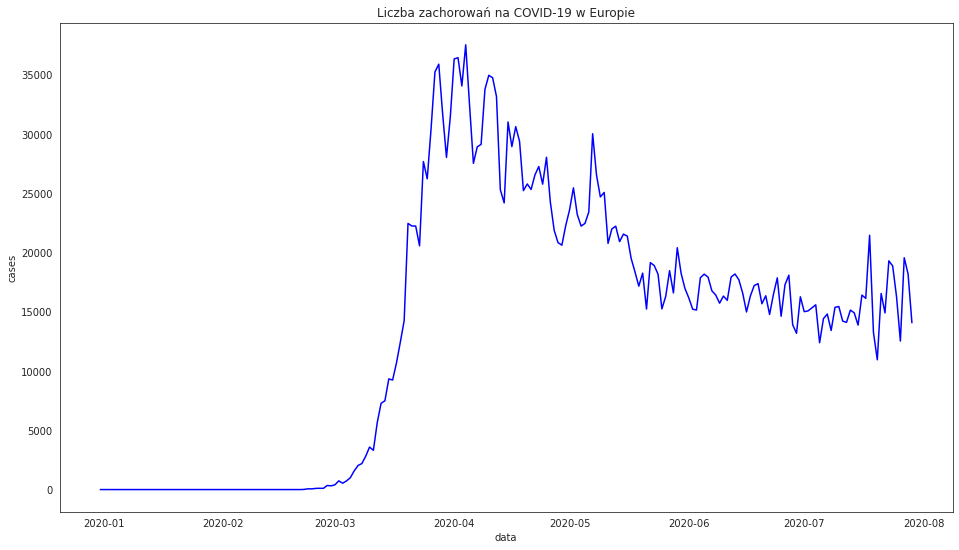

In [ ]:
df_wykres=df_wykres[df_wykres["data"] != "2020-07-03"]
plt.figure(figsize=(16,9))
sns.set_style("white")
wykres = sns.lineplot(x= "data", y= "cases", data = df_wykres, color = "blue")
wykres.set_title("Liczba zachorowań na COVID-19 w Europie")

In [ ]:
import plotly.express as px
wykres = px.line(df_wykres, x="data", y="cases", title = "Liczba zachorowań na COVID-19 w Europie")
wykres.show()

In [ ]:
wykres=px.line(df_all, x="data", y ="cases", color = "continentExp", title= "Liczba ofiar COVID-19 na świecie")
wykres.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
random_x = np.linspace(0,10,100)
random_y0 = np.random.randn(100)+10
random_y1 = np.random.randn(100)
random_y2 = np.random.randn(100)-10

fig=go.Figure()
fig.add_trace(go.Scatter(
    x=random_x,
    y=random_y0,
    mode="lines",
    name="Linia 1",
    marker = dict(color = "rgba(72, 191, 63, 1)"),
    text = "To jest punkt pomiaru dla linii 1"))
fig.add_trace(go.Scatter(
    x=random_x,
    y=random_y1,
    mode="markers",
    name="Linia 2",
    marker = dict(color = "rgba(63, 155, 191, 1)"),
    text = "To jest punkt pomiaru dla linii 2"))
fig.add_trace(go.Scatter(
    x=random_x,
    y=random_y2,
    mode="lines+markers",
    name="Linia 3",
    marker = dict(color = "rgba(191, 63, 135, 1)"),
    text = "To jest punkt pomiaru dla linii 3"))
fig.show()




In [ ]:
import plotly.express as px
URL="https://akademiadatascience.s3-eu-west-1.amazonaws.com/materialy/sds/modul4/populacja3.csv"
df = pd.read_csv(URL, sep= ";")
df_pie=df[df["TIME"]==2019]
df_pie=df_pie[df_pie["Value"].notna()]
#usuwanie Germany until 1990
df_pie=df_pie[df_pie["GEO"]!="Germany (until 1990 former territory of the FRG)"]
#klasyfikowanie krajów z populacją <5mln jako inne kraje
df_pie.loc[df_pie["Value"] < 5.e6, "GEO"] = "Inne kraje"

#budowanie wykresu

wykres_pie = px.pie(df_pie,
                    values = "Value",
                    names = "GEO",
                    title = "Populacja w Europie na 2019 rok")
wykres_pie.show()

In [ ]:
df_pie.head()

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
459,2019,Belgium,Total,Total,Number,11455519.0,NaN
460,2019,Bulgaria,Total,Total,Number,7000039.0,NaN
461,2019,Czechia,Total,Total,Number,10649800.0,NaN
462,2019,Denmark,Total,Total,Number,5806081.0,NaN
464,2019,Germany including former GDR,Total,Total,Number,83019213.0,NaN


In [ ]:
wykres_pie2 = px.pie(df_pie,
                    values = "Value",
                    names = "GEO",
                    title = "Populacja w Europie na 2019 rok",
                    color_discrete_sequence = px.colors.sequential.RdBu)
wykres_pie2.show()

In [ ]:
wykres_pie3 = px.pie(df_pie,
                    values = "Value",
                    names = "GEO",
                    title = "Populacja w Europie na 2019 rok",
                    color = "GEO")
wykres_pie3.show()

In [ ]:
wykres_pie4 = px.pie(df_pie,
                    values = "Value",
                    names = "GEO",
                    title = "Populacja w Europie na 2019 rok",
                    hover_data = ["AGE"],
                    labels = {"AGE" : "Grupy wiekowe"}) #dane po najechaniu kursora
wykres_pie4.update_traces(textposition = "inside", textinfo = "percent+label")
wykres_pie4.show()

In [ ]:
wykres_pie5 = px.pie(df_pie,
                    values = "Value",
                    names = "GEO",
                    title = "Populacja w Europie na 2019 rok",
                    hover_data = ["AGE"],
                    labels = {"AGE" : "Grupy wiekowe"},
                    hole = 0.2)
wykres_pie5.update_traces(textposition = "inside", textinfo = "percent+label")
wykres_pie5.show()

In [ ]:
import plotly.express as px
df_bar = px.data.gapminder().query("country == 'Poland'")
wykres_bar = px.bar(df_bar,
                    x= "year",
                    y= "pop",
                    title = "Hisotryczna populacja w Polsce")
wykres_bar.show()

In [ ]:
df_bar.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1224,Poland,Europe,1952,61.31,25730551,4029.329699,POL,616
1225,Poland,Europe,1957,65.77,28235346,4734.253019,POL,616
1226,Poland,Europe,1962,67.64,30329617,5338.752143,POL,616
1227,Poland,Europe,1967,69.61,31785378,6557.152776,POL,616
1228,Poland,Europe,1972,70.85,33039545,8006.506993,POL,616


In [ ]:
wykres_bar = px.bar(df_bar,
                    y= "pop",
                    x = "year",
                    color = "pop",
                    title = "Historyczna populacja w Polsce",
                    hover_data = ["lifeExp"],
                    labels = {"lifeExp": "Średnia długość życia mieszkańców :"},
                    height = 500,
                    orientation = "v")
wykres_bar.show()

In [ ]:
df_bar_pl = px.data.gapminder().query("country == 'Poland'")
df_bar_ge = px.data.gapminder().query("country == 'Germany'")
df_bar_no = px.data.gapminder().query("country == 'Norway'")

#Budowanie wykresu

wykres_bar2 = go.Figure()
wykres_bar2.add_trace(go.Bar(
    x = df_bar_pl["year"],
    y = df_bar_pl["pop"],
    name = "Poland"
))
wykres_bar2.add_trace(go.Bar(
    x = df_bar_ge["year"],
    y = df_bar_ge["pop"],
    name = "Germany"
))
wykres_bar2.add_trace(go.Bar(
    x = df_bar_no["year"],
    y = df_bar_no["pop"],
    name = "Norway"
))
wykres_bar2.update_layout(barmode = "group", title = "Historyczna populacja w Polsce, Niemczech i Norwegii")
wykres_bar2.show()

In [ ]:
df_bar_pl = px.data.gapminder().query("country == 'Poland'")
df_bar_ge = px.data.gapminder().query("country == 'Germany'")
df_bar_no = px.data.gapminder().query("country == 'Norway'")
#budowanie wykresu
wykres_bar3 = go.Figure()
wykres_bar3.add_trace(go.Bar(
    x = df_bar_pl["year"],
    y = df_bar_pl["pop"],
    name = "Poland",
    marker_color = "blue"
))
wykres_bar3.add_trace(go.Bar(
    x = df_bar_ge["year"],
    y = df_bar_ge["pop"],
    name = "Germany",
    marker_color = "red"
))
wykres_bar3.add_trace(go.Bar(
    x = df_bar_no["year"],
    y = df_bar_no["pop"],
    name = "Norway",
    marker_color = "yellow"
))
wykres_bar3.update_layout(barmode = "group", title = "Historyczna populacja w Polsce, Niemczech i Norwegii")
wykres_bar3.show()

In [ ]:
# histogramy
import plotly.express as px
df_hist = px.data.gapminder().query("country =='Poland'")
wykres_hist = px.histogram(df_hist, x = "gdpPercap")
wykres_hist.show()

In [ ]:
wykres_hist2 = px.histogram(df_hist, x= "gdpPercap", nbins = 150) #nbins = liczba słupków
wykres_hist2.show()

In [ ]:
wykres_hist3 = px.histogram(df_hist, x= "gdpPercap", histnorm = "percent")
wykres_hist3.show()

In [ ]:
wykres_hist4 = px.histogram(df_hist, x= "gdpPercap", histnorm = "probability")
wykres_hist4.show()

In [ ]:
df_hist_pl_de = px.data.gapminder().query("(country == 'Poland') | (country == 'Germany')")
wykres_hist5 = px.histogram(df_hist_pl_de, x = "gdpPercap", color = "country", marginal = "violin")
wykres_hist5.show()

In [ ]:
import plotly.graph_objects as go
wykres_hist5 = go.Figure(data = [go.Histogram(y=df_hist["gdpPercap"])])
wykres_hist5.show()

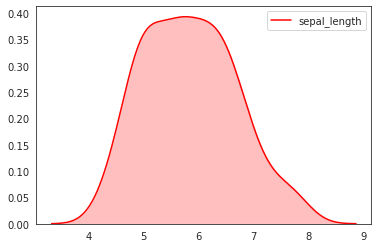

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_dens = sns.load_dataset("iris")
#tworzenie wykresu dla zmiennej sepal_length
sns.kdeplot(df_dens["sepal_length"], color = "red", shade = True)

In [ ]:
df_dens.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


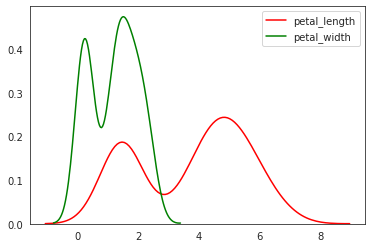

In [ ]:
sns.kdeplot(df_dens["petal_length"], color = 'red')
sns.kdeplot(df_dens["petal_width"], color = 'green')

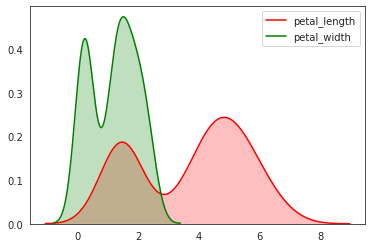

In [ ]:
sns.kdeplot(df_dens["petal_length"], color = 'red', shade = True)
sns.kdeplot(df_dens["petal_width"], color = 'green', shade = True)

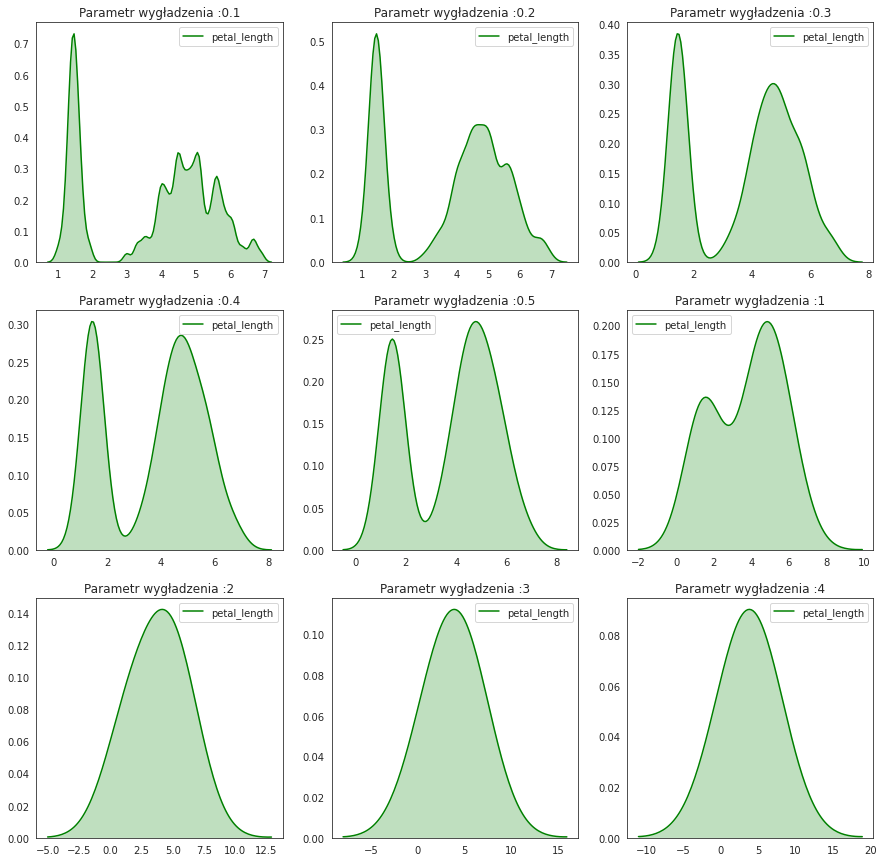

In [ ]:
# tworzenie zarysu ramek wykresów
f, axs = plt.subplots(3,3, figsize = (15,15))
#wypełnienie ramek
a=1
for wygladzenie in [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4]:
  plt.subplot(3,3,a)
  wykres = sns.kdeplot(df_dens["petal_length"],
                       bw = wygladzenie,
                       color = "green",
                       shade = True).set_title(f"Parametr wygładzenia :{wygladzenie}")
  a +=1

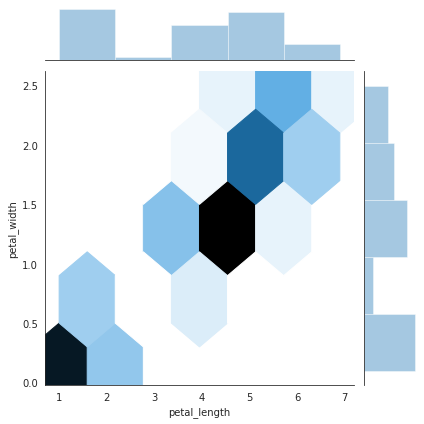

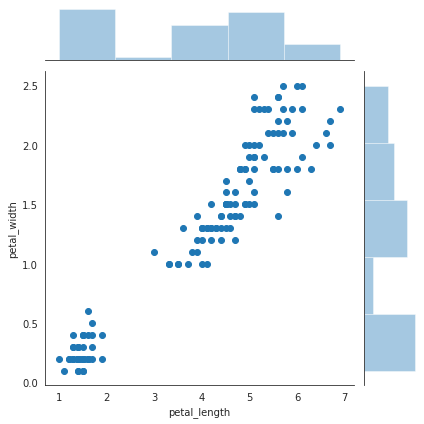

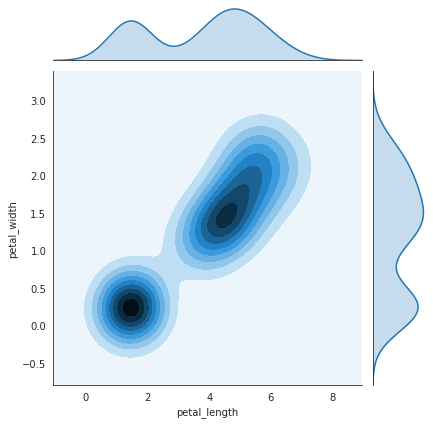

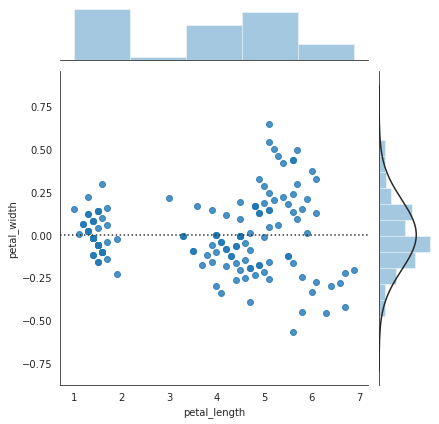

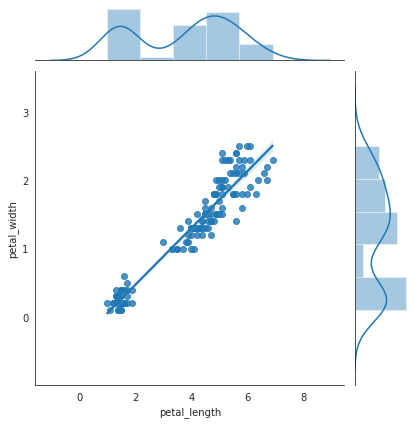

In [ ]:
sns.jointplot(x=df_dens["petal_length"], y=df_dens["petal_width"], kind = "hex")
sns.jointplot(x=df_dens["petal_length"], y=df_dens["petal_width"], kind = "scatter")
sns.jointplot(x=df_dens["petal_length"], y=df_dens["petal_width"], kind = "kde")
sns.jointplot(x=df_dens["petal_length"], y=df_dens["petal_width"], kind = "resid")
sns.jointplot(x=df_dens["petal_length"], y=df_dens["petal_width"], kind = "reg")

In [ ]:
import plotly.express as px
wykres_dens = px.histogram(df_dens,
                           x = "petal_length",
                           y = 'petal_width',
                           color = 'species',
                           marginal = 'box')
wykres_dens.show()

In [ ]:
df_dens["species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [ ]:
import plotly.figure_factory as ff
import numpy as np

grupy = ['virginica', 'versicolor', 'setosa']
ramka = [df_dens['petal_length'][df_dens['species'] == 'virginica'],
         df_dens['petal_length'][df_dens['species'] == 'versicolor'],
         df_dens['petal_length'][df_dens['species'] == 'setosa']]

#tworzenie wykresu
wykres_dens2 = ff.create_distplot(ramka, group_labels = grupy, bin_size = 0.1)
wykres_dens2.show()

In [ ]:
import pandas as pd
import plotly.express as px

URL= "https://akademiadatascience.s3-eu-west-1.amazonaws.com/materialy/sds/modul4/nieruchomosc.csv"
df_box = pd.read_csv(URL)
df_box.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
wykres_box = px.box(df_box, y= 'price')
wykres_box.show()

In [ ]:
# usuwanie nieruchomości ponad 1,5mln usd
df_box2 = df_box[df_box['price']<1e6]

wykres_box2 = px.box(df_box2, y= 'price')
wykres_box2.show()

In [ ]:
df_box2['city'].value_counts()

Seattle                1443
Renton                  291
Redmond                 220
Bellevue                214
Kent                    184
Issaquah                180
Auburn                  176
Sammamish               163
Kirkland                162
Federal Way             148
Shoreline               120
Woodinville             108
Maple Valley             96
Burien                   73
Snoqualmie               69
Kenmore                  65
Des Moines               58
Mercer Island            51
North Bend               50
Covington                42
Duvall                   42
Lake Forest Park         36
Bothell                  33
SeaTac                   29
Vashon                   29
Tukwila                  28
Enumclaw                 28
Newcastle                28
Carnation                21
Normandy Park            16
Black Diamond             9
Fall City                 9
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill          

In [ ]:
import plotly.graph_objects as go
wykres_box2_h= go.Figure()
wykres_box2_h.add_trace(go.Box(x = df_box2['price']))
wykres_box2_h.show()

In [ ]:
wykres_box3 = px.box(df_box2, x= 'bedrooms', y='price')
wykres_box3.show()

In [ ]:
wykres_box4 = px.box(df_box2, x= 'bedrooms', y='price', points = 'all')
wykres_box4.show()

In [ ]:
wykres_box5 = px.box(df_box2,
                     x= 'bedrooms',
                     y='price',
                     color = 'city',
                     title = 'cena nieruchomosci względem liczby sypialni'
                     ,hover_data=['yr_built']
                     ,labels = dict(yr_built = "rok budowy")
                     ,notched = True
                     ,facet_col="floors"
                     ,height=800
                     ,width=1000
)

wykres_box5.show()

In [ ]:
import plotly.express as px
df_scat = px.data.gapminder().query("(country == 'Germany')")
wykres_scat = px.scatter(df_scat, x= "gdpPercap", y = "pop")
wykres_scat.show()

In [ ]:
df_scat.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
564,Germany,Europe,1952,67.5,69145952,7144.114393,DEU,276
565,Germany,Europe,1957,69.1,71019069,10187.826650,DEU,276
566,Germany,Europe,1962,70.3,73739117,12902.462910,DEU,276
567,Germany,Europe,1967,70.8,76368453,14745.625610,DEU,276
568,Germany,Europe,1972,71.0,78717088,18016.180270,DEU,276


In [ ]:
df_scat_fr_de = px.data.gapminder().query("(country == 'France') | (country =='Germany')")
wykres_scat2 = px.scatter(df_scat_fr_de,
                          x= 'gdpPercap',
                          y = 'lifeExp',
                          color ='country',
                          size = 'pop',
                          hover_data = ['iso_alpha', 'lifeExp'],
                          labels= {"lifeExp": "Średnia długość życia"})
wykres_scat2.update_layout(
    xaxis = dict(title="PKB per capita"),
    annotations =[
                  dict(
                      x=1.12,
                      y=1.05,
                      align = 'right',
                      valign = 'top',
                      text = "Kraje: ",
                      showarrow = False,
                      xref = 'paper',
                      yref = 'paper',
                  )]
)
wykres_scat2.show()

In [ ]:
import numpy as np
N = 10000
wykres_scat3 = go.Figure(data = go.Scattergl(
    x=np.random.randn(N),
    y=np.random.randn(N),
    mode = "markers",
    marker = dict(
        color = np.random.randn(N),
        colorscale = "Viridis",
        line_width = 0.5
    )
))
wykres_scat3.show()

In [ ]:
import pandas as pd
import plotly.express as px
URL= "https://akademiadatascience.s3-eu-west-1.amazonaws.com/materialy/sds/modul4/nieruchomosc.csv"
df_violin = pd.read_csv(URL)

wykres_violin = px.violin(df_violin, y = "price")
wykres_violin.show()

In [ ]:
df_violin2 = df_violin[df_violin['price'] < 1.5e6]
df_violin2.head()
wykres_violin2 = px.violin(df_violin2, y = 'price')
wykres_violin2.show()

In [ ]:
wykres_violin3 = px.violin(df_violin2, y = 'price', box = True)
wykres_violin3.show()

In [ ]:
wykres_violin4 = px.violin(df_violin2,
                           y='price',
                           box=True,
                           points = "all")
wykres_violin4.show()

In [ ]:
wykres_violin5 = px.violin(df_violin2,
                           y='price',
                           box=True,
                           points = "all",
                           color = 'bedrooms'
                           #,violinmode = 'overlay'
                           )
wykres_violin5.show()

In [ ]:
wykres_violin6 = px.violin(df_violin2[df_violin2['bedrooms'].isin([1,2,3])],
                           y='price',
                           box=True,
                           points = "all",
                           color = 'bedrooms',
                           violinmode = 'overlay')
wykres_violin6.show()

In [ ]:
wykres_violin7 = px.violin(df_violin2[df_violin2['bedrooms'].isin([1,2,3])],
                           y='price',
                           box=True,
                           points = "all",
                           color = 'bedrooms',
                           violinmode = 'group',
                           hover_data = df_violin2.columns
                           )
wykres_violin7.show()

In [ ]:
import plotly.graph_objects as go

wykres_violin8 = go.Figure()
wykres_violin8.add_trace(
    go.Violin(x=df_violin2['price'][df_violin2['bedrooms'] == 1 ],
              name = "1 sypialnia")
)
wykres_violin8.add_trace(
    go.Violin(x=df_violin2['price'][df_violin2['bedrooms'] == 2 ],
              name = "2 sypialnia")
)
wykres_violin8.update_traces(meanline_visible = True, points = 'all')
wykres_violin8.update_layout(title_text = 'Cena nieruchomości z podziałem na<br><b><i> liczbę sypialni')
wykres_violin8.show()